In [8]:
import os
print(os.getcwd())
print(os.listdir())

c:\Ai_Project
['.git', '.venv', 'calculator.py', 'calcultor_operations.py', 'dataset', 'diabetes.csv', 'EDA.ipynb', 'EDA.py', 'font', 'history.txt', 'human.txt', 'process.py', 'python1일차.ipynb', 'python2일차.ipynb', 'python3일차.ipynb', 'python4일차.ipynb', 'python4일차계산기.ipynb', 'python5일차.ipynb', 'python6일차.ipynb', 'python6일차Boston.ipynb', 'python7일차.ipynb', 'python공유문제.ipynb', 'python공유문제2.ipynb', 'report', 'student_data.py', 'watertot.csv', '__pycache__']


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random

In [10]:
# 재현성을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

In [11]:
# 데이터 준비
X = np.array([[1],[2],[3],[4],[5]]) # 독립 변수
y = np.array([2,4,5,4,5]) # 종속 변수

In [12]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):",model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 예측 값:", y_test)
print("테스트 세트 예측 값", predictions)
print("\n모델 성능:")
print("R2 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 4
테스트 데이터 크기: 1

모델 계수:
기울기 (slope): 0.6857142857142857
절편 (intercept): 1.7714285714285714

테스트 세트 예측 값: [4]
테스트 세트 예측 값 [3.14285714]

모델 성능:
R2 점수: nan
평균 제곱 오차 (MSE): 0.7346938775510206


c:\Ai_Project\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

기술통계:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.3

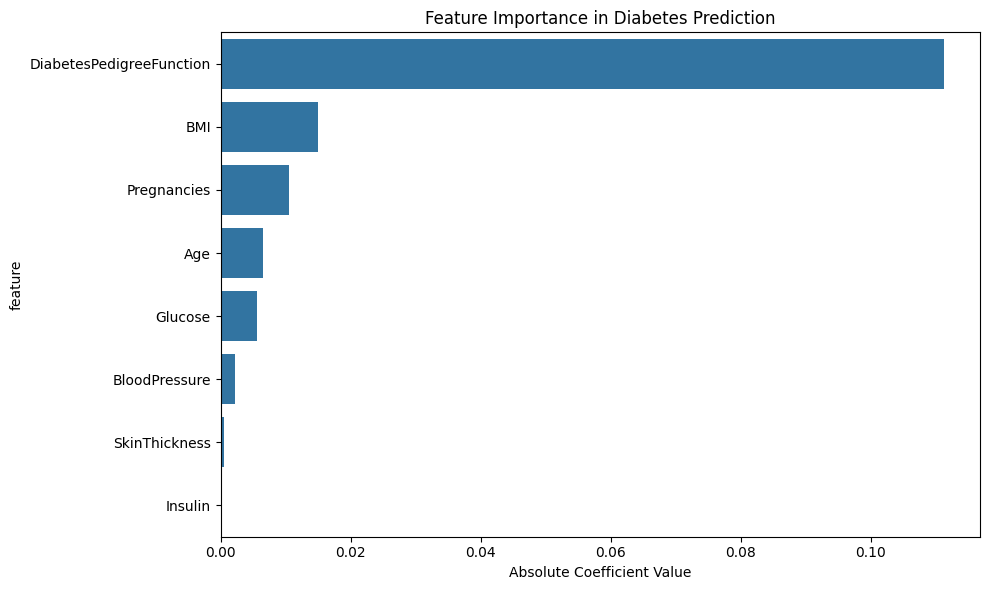

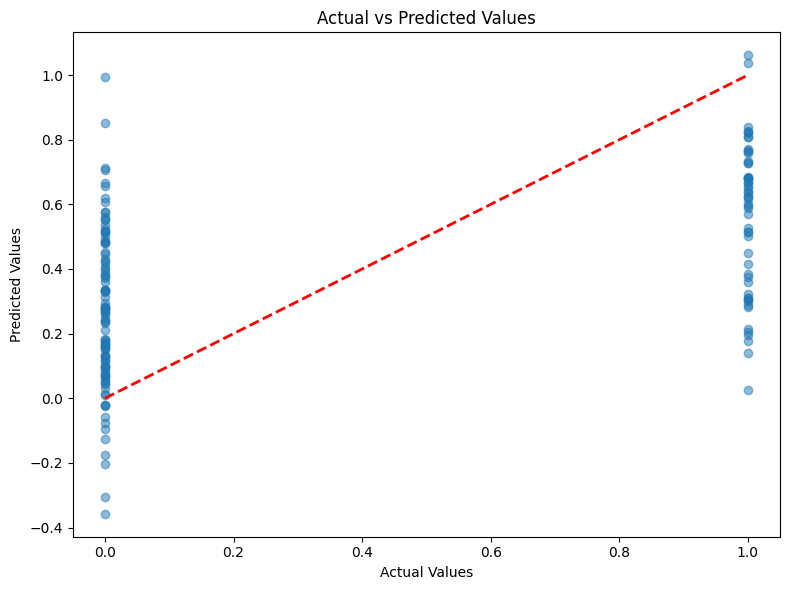

In [16]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

# 데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1) # Outcome을 제외한 모든 특성
y= df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
print("\n모델 성능:")
print("R2 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

# 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)

# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance',y='feature',data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

#시각화: 실제값 vs 예측값
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [17]:
# 다중선형회귀
import numpy as np
from sklearn.linear_model import LinearRegression

# 샘플 데이터 생성
# 공부 시간(X1)과 과외 시간(X2)에 따른 시험 점수(Y) 예측
study_hours = np.array([2,3,4,5,4,6,7,8,5,4]) # 하루 공부 시간
tutor_hours = np.array([0,1,0,2,1,3,2,3,2,1]) # 주간 과외 시간
test_scores = np.array([60,70,75,85,75,90,92,95,80,75]) # 시험 점수

# 입력 데이터 형태 맞추기
X = np.column_stack((study_hours, tutor_hours))
y = test_scores
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

# 새로운 데이터로 예측
new_student = np.array([[6,2]]) # 공부 6시간, 과외 2시간
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")

# 모델 성능 평가 (R_squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39

예측 점수: 86.5
R-squared: 0.9613


회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


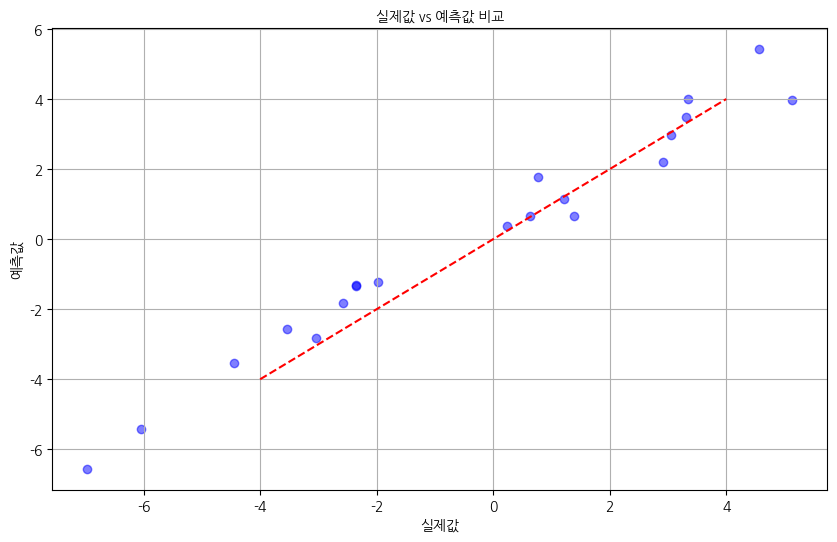


새로운 데이터 예측값: 3.2192


c:\Ai_Project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 3. 폰트 설정
# font_path = 'C:/Ai_Project/font/NanumGothic.ttf'
font_path = 'font/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
pd.options.display.float_format = '{:.2f}'.format # 지수 표현식 방지

# 4. 데이터 생성
np.random.seed(42)
n_samples = 100

# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

# 종속변수 생성 (Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2 * X1 + 3 * X2 + 1.5 * X3 + np.random.normal(0,1,n_samples)

# 5. 데이터프레임 생성
data = pd.DataFrame({
    'X1':X1,
    'X2':X2,
    'X3':X3,
    'Y':Y
})

# 6. 학습용과 테스트용 데이터 분리
X = data[['X1','X2','X3']]
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 8. 예측
y_pred = model.predict(X_test)

# 9. 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

#10. 실제값과 예측값 비교 시각화
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4,4],[-4,4], 'r--') # 대각선
plt.xlabel('실제값', fontproperties=fontprop)
plt.ylabel('예측값', fontproperties=fontprop)
plt.title('실제값 vs 예측값 비교', fontproperties=fontprop)
plt.grid(True)
plt.show()

# 11. 새로운 데이터로 예측
new_data = np.array([[0.5, 1.0, -0.5]])
prediction = model.predict(new_data)
print(f"\n새로운 데이터 예측값: {prediction[0]:.4f}")

In [19]:
# 선형회귀 추가학습
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')

In [21]:
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [23]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [25]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

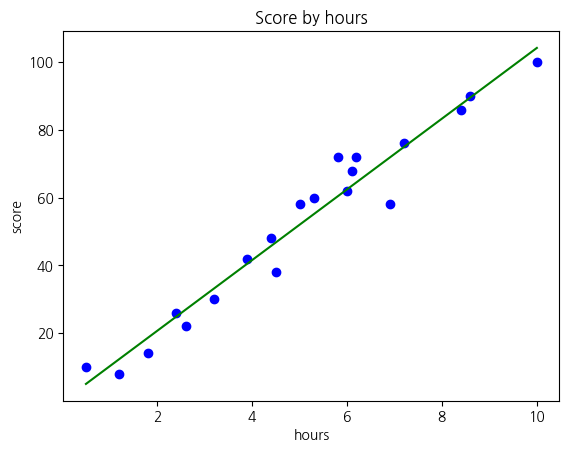

In [26]:
plt.scatter(X,y, color='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [27]:
print('9 시간 공부 시 예상점수:', reg.predict([[9]]))

9 시간 공부 시 예상점수: [93.77478776]


In [28]:
reg.coef_ #기울기(m)

array([10.44369694])

In [29]:
reg.intercept_ #y절편(b)

-0.218484702867201

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [32]:
X = dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [35]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [36]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [37]:
y, (len(y))

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [38]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [39]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [41]:
reg.fit(X_train, y_train)

LinearRegression()

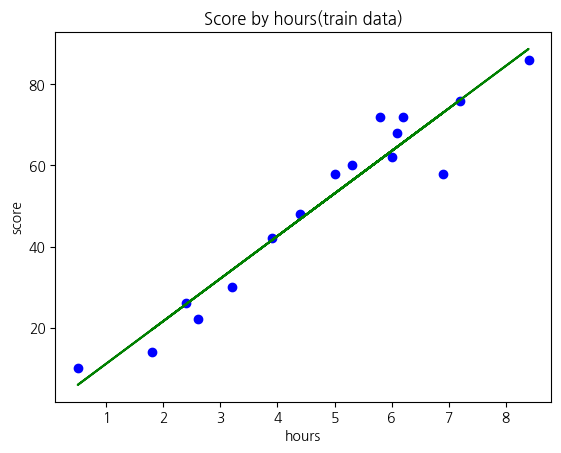

In [42]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [44]:
reg.coef_

array([10.49161294])

In [45]:
reg.intercept_

0.6115562905169369

In [46]:
reg.score(X_test, y_test)

0.9727616474310156

In [47]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1) 
# max_iter : 모델 학습 횟수, eta-: 학습율(1e-4: 0.0001), verbose=1 학습결과출력
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

c:\Ai_Project\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

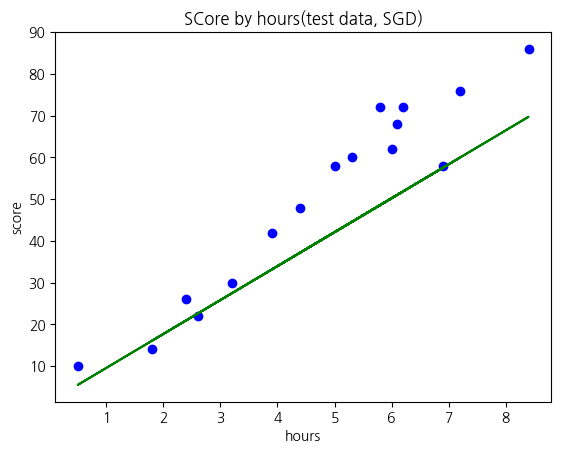

In [48]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, sr.predict(X_train), color='green')
plt.title('SCore by hours(test data, SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [49]:
sr.coef_, sr.intercept_

(array([8.13259556]), array([1.433206]))

In [50]:
sr.score(X_test, y_test)

0.884872663907813

In [51]:
sr.score(X_train, y_train)

0.6837363504701681

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./dataset/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.50,0
1,1.20,0
2,1.80,0
3,2.40,0
4,2.60,0


In [57]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [59]:
classifier.predict([[6]])

array([1], dtype=int64)

In [60]:
classifier.predict_proba([[6]]) # predict_proba : 각 클래스에 속할 확률(분류에 사용)

array([[0.141483, 0.858517]])

In [61]:
classifier.predict([[4]])

array([0], dtype=int64)

In [63]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [64]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 0, 1, 1], dtype=int64)

In [65]:
y_test

array([1, 0, 1, 0], dtype=int64)

In [66]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [67]:
# 정확도 반환
classifier.score(X_test, y_test)

0.75

In [70]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\human-14\AppData\Local\Temp\ipykernel_8392\3009068081.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [72]:
p = 1/(1+np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [73]:
X_range.shape

(95,)

In [74]:
p=p.reshape(-1)
p.shape

(95,)

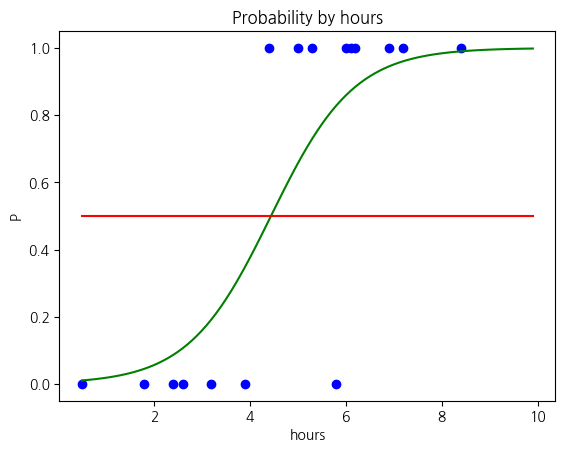

In [75]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color= 'green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

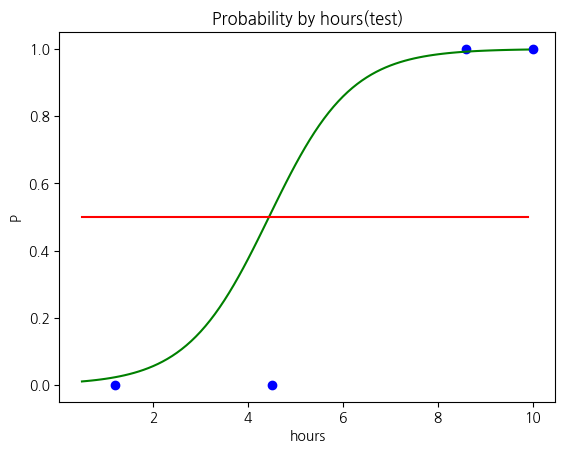

In [77]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')  # y축에 일정한 값인 0.5를 유지하는 직선
plt.title('Probability by hours(test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [82]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [83]:
# 데이터 로드
iris=load_iris()
X = iris.data
y = iris.target

In [95]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# 의사결정 나무 모델 생성 및 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
# 예측
y_pred = clf.predict(X_test)

In [98]:
# 정확도 평가
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


나이브 베이즈

In [99]:
# 스팸메일 분류 예제
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [100]:
# 1. 데이터 불러오기
data = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')
data=data[['v1','v2']] # 필요한 열만 선택
data.columns=['label','text'] # 열 이름 변경

In [101]:
# 2. 데이터 전처리 - 데이터 전처리는 머신 러닝 모델의 성능을 높이기 위해 원본 데이터를 가공하고 정제하는 중요한 과정
# EDA도 데이터 전처리 과정 중 하나이다
data['label'] = data['label'].map({'ham': 0, 'spam': 1}) # 레이블을 숫자로 변환
data.dropna(inplace=True) # 결측치 제거

In [102]:
# 3. 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [103]:
# 4. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [105]:
# 5. 모델 학습
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [106]:
# 6. 예측 및 평가
y_pred = model.predict(x_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [111]:
# 7. 샘플 테스트
sample_text = ["Free entry in 2 a wkly comp to win FA cup final tkts 21st May 2005. Text FA to 87121 now!",
               "Congratulations! you've been selected to receive a free iPhone 15. Click to claim now!",
               "Hey, are we meeting for lunch tomorrow?"]
sample_tfidf = vectorizer.transform(sample_text)
predictions = model.predict(sample_tfidf)
for text, label in zip(sample_text, predictions):
    print(f"Text: {text} => {'Spam' if label == 1 else 'Ham'}")

Text: Free entry in 2 a wkly comp to win FA cup final tkts 21st May 2005. Text FA to 87121 now! => Spam
Text: Congratulations! you've been selected to receive a free iPhone 15. Click to claim now! => Spam
Text: Hey, are we meeting for lunch tomorrow? => Ham
